In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Energy_consumption.csv")

In [4]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [5]:
import pandas as pd

df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          1000 non-null   datetime64[ns]
 1   Temperature        1000 non-null   float64       
 2   Humidity           1000 non-null   float64       
 3   SquareFootage      1000 non-null   float64       
 4   Occupancy          1000 non-null   int64         
 5   HVACUsage          1000 non-null   object        
 6   LightingUsage      1000 non-null   object        
 7   RenewableEnergy    1000 non-null   float64       
 8   DayOfWeek          1000 non-null   object        
 9   Holiday            1000 non-null   object        
 10  EnergyConsumption  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 86.1+ KB


<Axes: xlabel='DayOfWeek', ylabel='EnergyConsumption'>

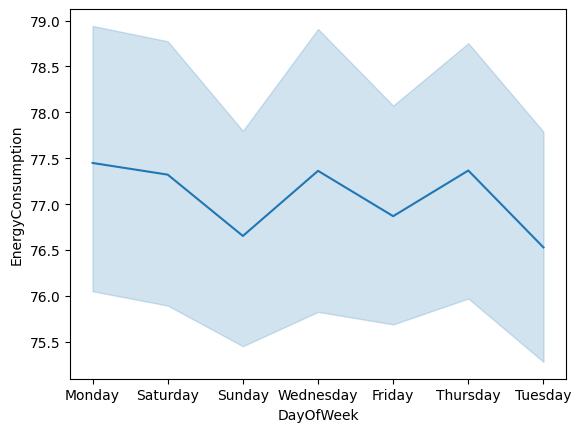

In [7]:
sns.lineplot(x="DayOfWeek",y="EnergyConsumption",data=df)

<Axes: xlabel='LightingUsage', ylabel='EnergyConsumption'>

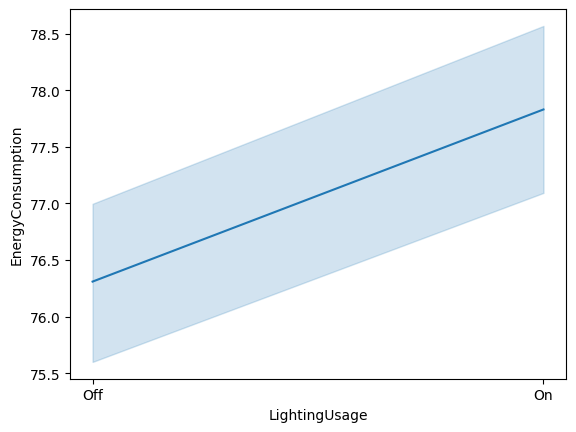

In [8]:
sns.lineplot(y="EnergyConsumption",x="LightingUsage",data=df)

<Axes: xlabel='HVACUsage', ylabel='EnergyConsumption'>

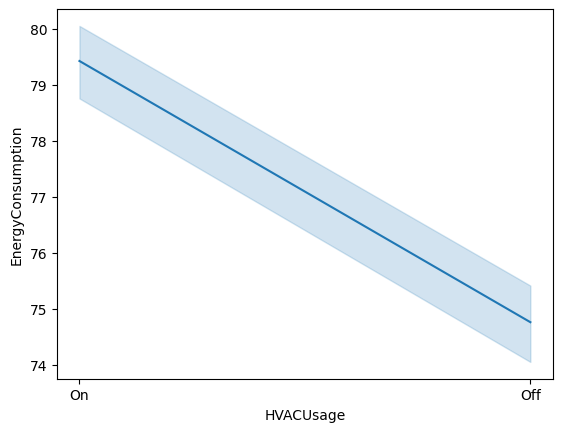

In [9]:
sns.lineplot(y="EnergyConsumption",x="HVACUsage",data=df)

<Axes: xlabel='Temperature', ylabel='EnergyConsumption'>

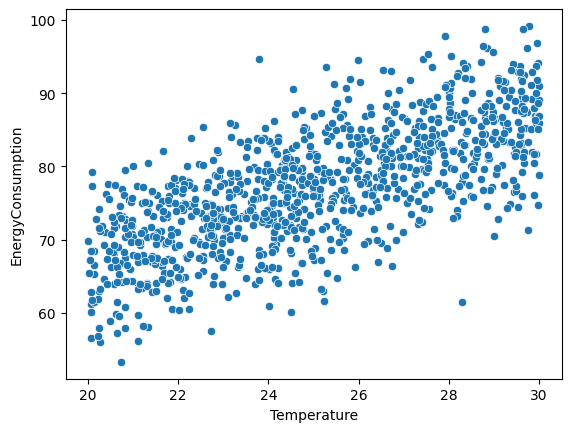

In [10]:
sns.scatterplot(y="EnergyConsumption",x="Temperature",data=df)

<Axes: xlabel='Humidity', ylabel='EnergyConsumption'>

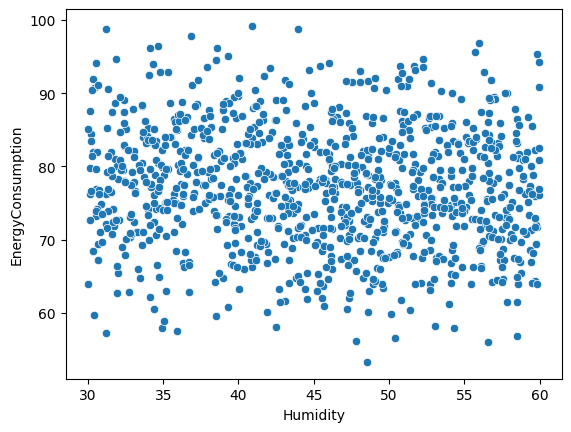

In [11]:
sns.scatterplot(y="EnergyConsumption",x="Humidity",data=df)

<Axes: xlabel='SquareFootage', ylabel='EnergyConsumption'>

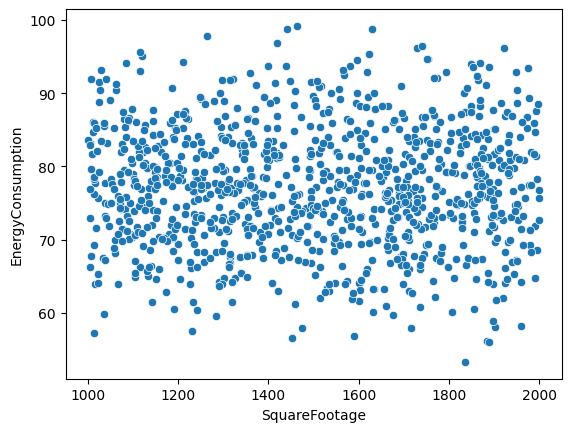

In [12]:
sns.scatterplot(y="EnergyConsumption",x="SquareFootage",data=df)

<Axes: xlabel='Occupancy', ylabel='EnergyConsumption'>

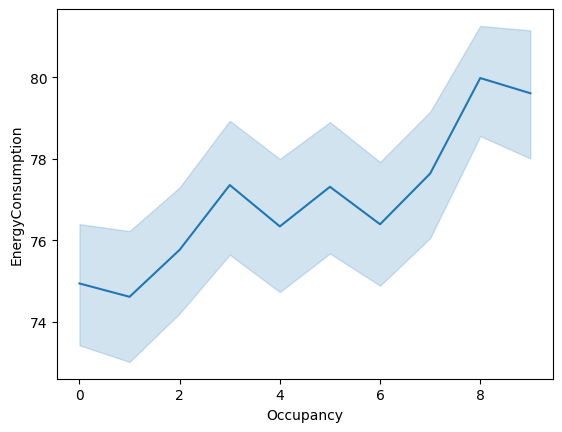

In [13]:
sns.lineplot(y="EnergyConsumption",x="Occupancy",data=df)

<Axes: xlabel='Holiday', ylabel='EnergyConsumption'>

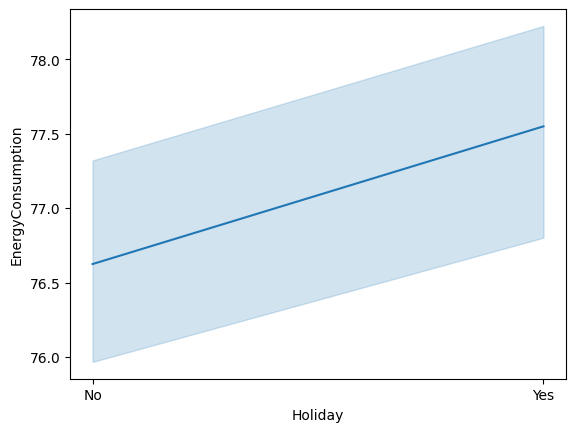

In [14]:
sns.lineplot(x="Holiday",y="EnergyConsumption",data=df)

<Axes: xlabel='RenewableEnergy', ylabel='EnergyConsumption'>

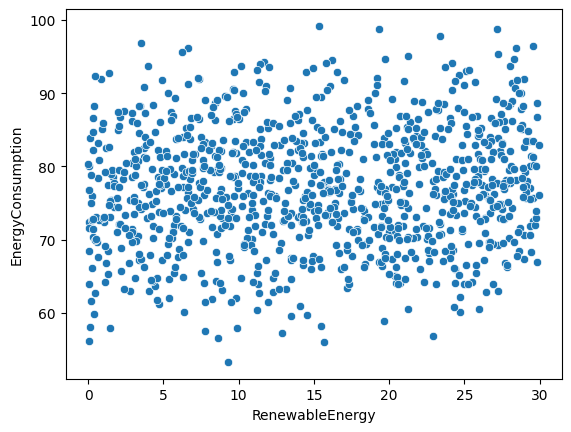

In [15]:
sns.scatterplot(x="RenewableEnergy",y="EnergyConsumption",data=df)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['HVACUsage','LightingUsage','Holiday',"DayOfWeek"]:
    df[i] = le.fit_transform(df[i])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          1000 non-null   datetime64[ns]
 1   Temperature        1000 non-null   float64       
 2   Humidity           1000 non-null   float64       
 3   SquareFootage      1000 non-null   float64       
 4   Occupancy          1000 non-null   int64         
 5   HVACUsage          1000 non-null   int32         
 6   LightingUsage      1000 non-null   int32         
 7   RenewableEnergy    1000 non-null   float64       
 8   DayOfWeek          1000 non-null   int32         
 9   Holiday            1000 non-null   int32         
 10  EnergyConsumption  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int32(4), int64(1)
memory usage: 70.4 KB


In [18]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,1,0,2.774699,1,0,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,1,1,21.831384,2,0,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,0,0,6.764672,3,0,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,0,1,8.623447,6,0,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,1,0,3.071969,0,0,70.811732


In [19]:
X = df.drop(columns=['EnergyConsumption',"Timestamp"])
y = df['EnergyConsumption']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

## Selecting the model and choosing the parameters

In [21]:
from sklearn.linear_model import LinearRegression

model_params = {
    'linear_regression': {
        'model': LinearRegression(),
        'params' : {
            'fit_intercept': [True, False],
            'copy_X': [True, False],
            'n_jobs': [None, 1, -1],
            'positive': [True, False]
        }
    }
}

model = LinearRegression()

In [22]:
from sklearn.model_selection import GridSearchCV
scores = []



for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
best = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best

,model,best_score,best_params
0,linear_regression,0.612601,"{'copy_X': True, 'fit_intercept': True, 'n_job..."


In [23]:
# Fit the final model with the best parameters
best_model_params = best.loc[best['model'] == 'linear_regression', 'best_params'].values[0]
final_model = LinearRegression(**best_model_params)
final_model.fit(X_train, y_train)

LinearRegression(positive=True)

In [24]:
y_pred = final_model.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Mean Absolute Error: 4.105494668584672
Mean Squared Error: 26.478930032168474
Root Mean Squared Error: 5.145768167355431
R² Score: 0.5957407580531275


In [28]:
def plot_regression_line(X, y, y_pred):
    
    # Check if X is a 2D array and flatten it if necessary
    if X_test.ndim > 1:
        X = X_test.flatten()
    
    # Sort the X values and the corresponding predicted values for a proper regression line
    sorted_indices = np.argsort(X)
    X_sorted = X[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]
    
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual values')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Actual vs Predicted values')
    plt.legend()
    plt.show()



# Plot the regression line
plot_regression_line(X_test, y_test, y_pred)




AttributeError: 'DataFrame' object has no attribute 'flatten'